# <font color='#F5B167'> MD009 Maximum-likelihood estimation </font>

Vamos a probar el ajuste de una función usando el método de máxima verosimilitud. Lo haremos en el caso sencillo de una distribución de probabilidad normal. 

In [1]:
N = 1000
x = rnorm(N, mean = 3, sd = 2)

[1] 3.086365

[1] 2.006104

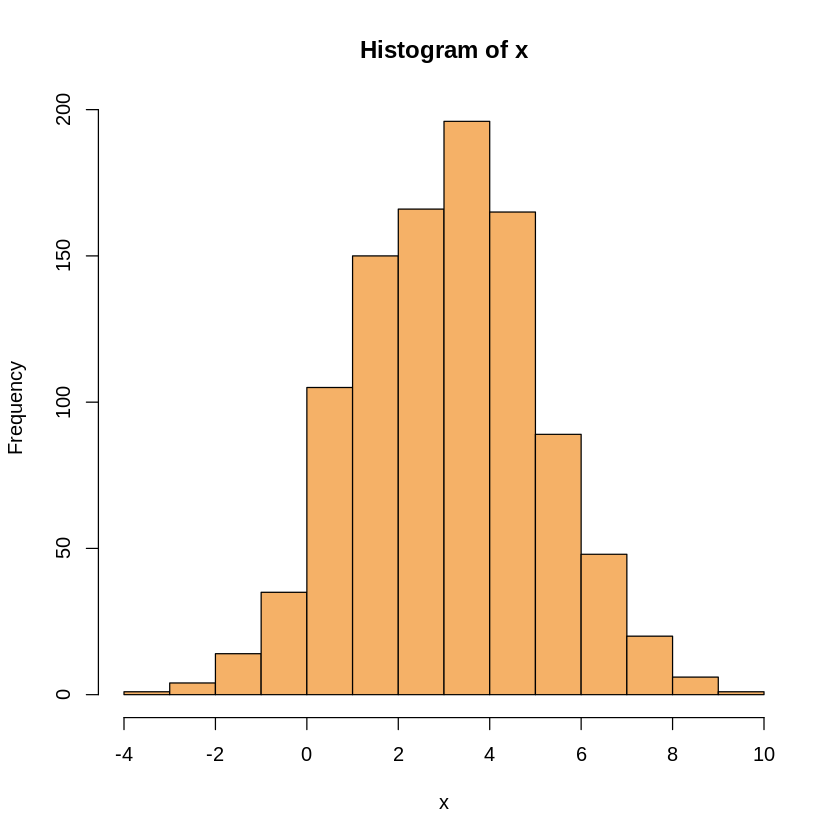

In [2]:
hist(x, col = '#F5B167')
mean(x)
sd(x)

A continuación definimos en una función el log-likelihood correspondiente a una normal:

In [3]:
LL <- function(mu, sigma) {
        R = dnorm(x, mu, sigma)
        -sum(log(R))
}

Y usaremos la función mle() para estimar los parámetros, media y desviación estándar que mejor se ajustan a los datos.

In [4]:
library(stats4)
fit = mle(LL, start = list(mu = 1, sigma = 1), method = "L-BFGS-B", lower = c(-Inf, 0), upper = c(Inf, Inf))
summary(fit)

Maximum likelihood estimation

Call:
mle(minuslogl = LL, start = list(mu = 1, sigma = 1), method = "L-BFGS-B", 
    lower = c(-Inf, 0), upper = c(Inf, Inf))

Coefficients:
      Estimate Std. Error
mu    3.086366 0.06340662
sigma 2.005093 0.04483496

-2 log L: 4229.266 

Se han especificado límites a los parámetros para no permitir una desviación estándar negativa. Además se han puesto valores iniciales que ayudan a la convergencia del ajuste. Como vemos, los parámetros estimados están de acuerdo con los valores de nuestra distribución generada, dentro del error. $\mu=2.95\pm0.06$ y $\sigma=1.95\pm0.04$.

Podemos visualizar los intervalos de error de los parámetros ajustados:

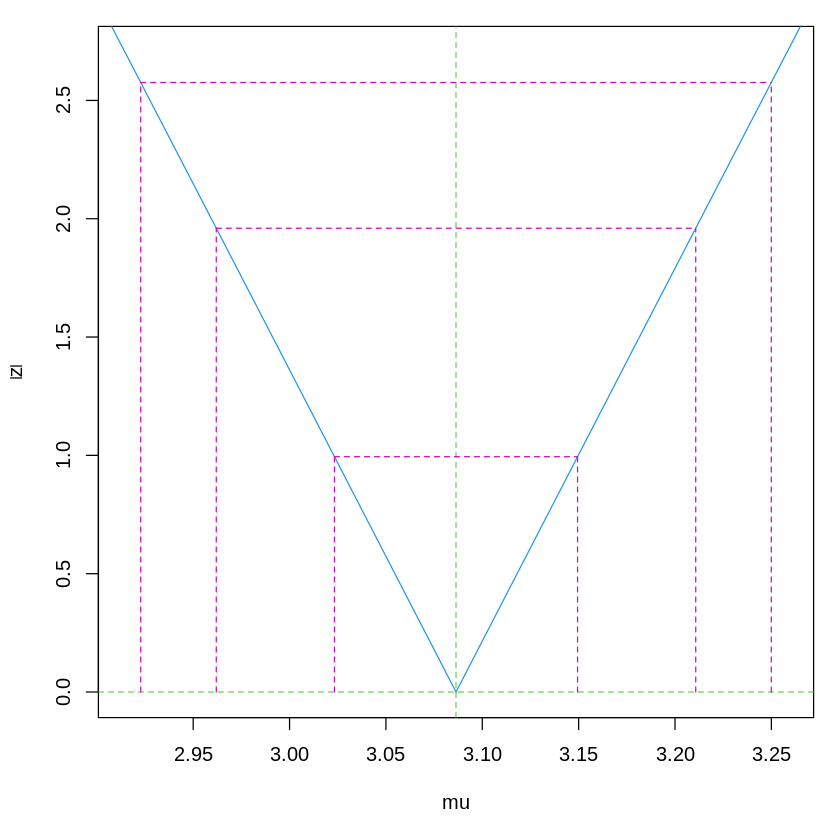

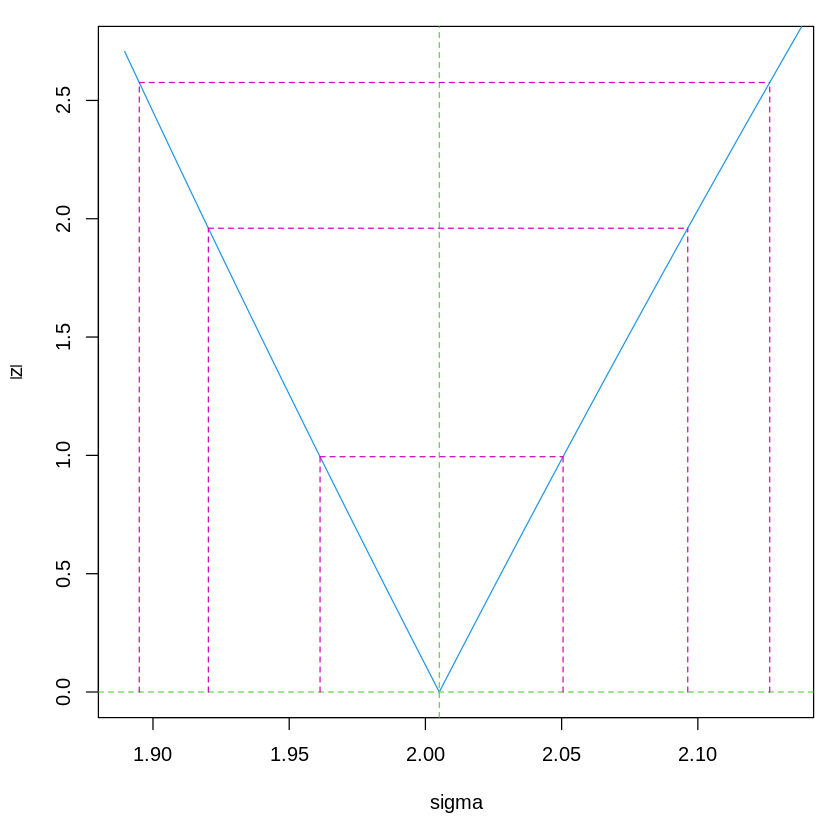

In [5]:
plot(profile(fit), conf = c(99, 95, 68)/100)

Y ver gráficamente el ajuste:

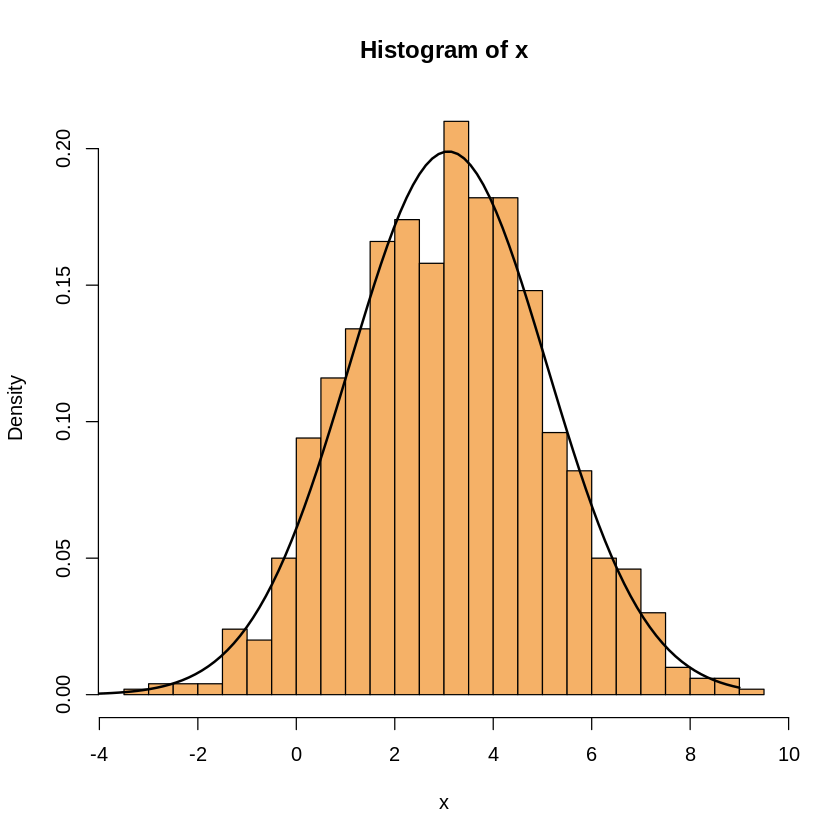

In [6]:
hist(x, freq = FALSE, breaks = 20, col = '#F5B167')
curve(dnorm(x, mean = coef(fit)[1], sd = coef(fit)[2]), col = 'black', from = -4, to = 9, add = TRUE, lwd = 2)